In [ ]:
## https://ayoolafelix.hashnode.dev/how-to-permanently-install-a-module-on-google-colab-ckixqrvs40su044s187y274tc
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
# from pandas_datareader import data as wb
import plotly.io as pio
# import investpy
from datetime import date
from datetime import datetime, timedelta
from pytz import timezone
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
# import pandas_ta as ta

import math
import yfinance as yf
import warnings
from datetime import date
from datetime import datetime

In [ ]:
#Yahoo Finance API to get historical data

today = datetime.now()
today = today.strftime("%Y-%m-%d")   #Different API used,different datetime formats
last_one_year= datetime.today() - timedelta(days=360)
last_one_year = last_one_year.strftime("%Y-%m-%d")
#Extracting Last 1 year data of NF using yfinance
df = yf.download('^NSEI', start = last_one_year)
# df = df.to_frame().reset_index()  
# df = df.rename(columns={'Adj Close': 'Close'})
# df = df.set_index(pd.DatetimeIndex(df['Date']))

# print(type(df))
# print("yfinance NF Dataframe",df.tail())

#Extracting Last 1 year data of BNF using yfinance with intercal of "1d"
bnf = yf.download('^NSEBANK', start = last_one_year) #^NSEBANK
nf_it = yf.download('^CNXIT', start = last_one_year)
nf_vix = yf.download('^INDIAVIX', start = last_one_year)
usd_inr = yf.download('USDINR=X', start = last_one_year)

#https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe
# bnf = bnf.to_frame().reset_index()
# bnf = bnf.rename(columns={'Adj Close': 'Close'})
#https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr
# bnf = bnf.set_index(pd.DatetimeIndex(bnf['Date']))

# #nf hourly data
# nf_hourly_data = yf.download(tickers="^NSEI", period="6000d", interval="1h")['Adj Close']
# print("Nifty Hourly Data",nf_hourly_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# df.to_csv('nf.csv')
#India VIX or India Volatility Index is a volatile index that is calculated by the NSE to measure the market's anticipation for volatility and fluctuations in the near term.
#This index was first introduced by the NSE in the year 2003

df['vix'] = nf_vix['Close'].round(decimals = 1)
nf_weekly_mean_reversion = df.asfreq('B', method='ffill')
wed_thu_mean_reversion = df.asfreq('B', method='ffill')
# fin_nf['pct_change']  = round(np.log(1+fin_nf["Close"].pct_change())*100,2)
usd_inr['pct_change']  = round(np.log(1+usd_inr["Close"].pct_change())*100,2)

#NF 
df_close = df.loc[:, df.columns == 'Close']
# print("NF Working Day's in Last 1 Year is",df.shape[0])

#BNF
bnf_close = bnf.loc[:, bnf.columns == 'Close']
# print("BNF Working Day's in Last 1 Year is",bnf.shape[0])

#Daily Percentage change in Nifty 50 Index
df['pct_change'] = round(np.log(1+df["Close"].pct_change())*100,2)
# decimals = 2    
# daily_returns['Close'] = daily_returns['Close'].apply(lambda x: round(x, decimals))
# daily_returns.Close = daily_returns.Close.round(decimal=2)
# print(daily_returns.head())

#Daily Percentage change in BankNifty Index
bnf['pct_change']  = round(np.log(1+bnf["Close"].pct_change())*100,2)
# decimals = 2   
# bnf_daily_returns['Close'] = bnf_daily_returns['Close'].apply(lambda x: round(x, decimals))
# daily_returns.Close = daily_returns.Close.round(decimal=2)
# bnf_daily_returns.head()
# df = df.applymap("{0:.2f}%".format)

nf_it['pct_change']  = round(np.log(1+nf_it["Close"].pct_change())*100,2)

df['weekday'] = df.index.day_name()
bnf['weekday'] = bnf.index.day_name()
nf_it['weekday'] = nf_it.index.day_name()
usd_inr['weekday'] = usd_inr.index.day_name()
# fin_nf['weekday'] = fin_nf.index.day_name()

##1 Year percentage return of NF and BNF
df['pct_chart'] = round(df['Close'].pct_change().cumsum()*100,2)
bnf['pct_chart'] = round(bnf['Close'].pct_change().cumsum()*100,2)
nf_it['pct_chart'] = round(nf_it['Close'].pct_change().cumsum()*100,2)
usd_inr['pct_chart'] = round(usd_inr['Close'].pct_change().cumsum()*100,2)
# fin_nf['pct_chart'] = round(fin_nf['Close'].pct_change().cumsum()*100,2)

##Percentchage Difference between BNF and NF
df['bnf-nf_diff_pct_chart'] = round(bnf['pct_chart'] - df['pct_chart'],2)
df['bnf_nf_ratio'] = round(bnf['Close']/df['Close'],2)
df['bnf_nf_ratio'] 

# Testing on Different Moving Average Time Periods such as 5,20.Code as below.
df['MA20'] = df['bnf_nf_ratio'] .rolling(20).mean().round(2)
df['bnf_nf_std'] = df['bnf_nf_ratio'].rolling(20).std(ddof = 0)
df['bb_upper_pair'] = df['MA20'] + (df['bnf_nf_std'] * 2).round(2)
df['bb_lower_pair'] = df['MA20'] - (df['bnf_nf_std'] * 2).round(2)
df

,Open,High,Low,Close,Adj Close,Volume,vix,pct_change,weekday,pct_chart,bnf-nf_diff_pct_chart,bnf_nf_ratio,MA20,bnf_nf_std,bb_upper_pair,bb_lower_pair
Date,,,,,,,,,,,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,NaN,NaN,Monday,NaN,NaN,2.07,NaN,NaN,NaN,NaN
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,NaN,1.01,Tuesday,1.02,0.13,2.07,NaN,NaN,NaN,NaN
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,NaN,0.67,Wednesday,1.69,1.78,2.10,NaN,NaN,NaN,NaN
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,NaN,-1.01,Thursday,0.69,2.24,2.11,NaN,NaN,NaN,NaN
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,NaN,0.38,Friday,1.07,2.52,2.12,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,18288.800781,18318.750000,18068.599609,18127.349609,18127.349609,195700,NaN,-0.40,Thursday,4.24,13.10,2.34,2.34,0.023324,2.39,2.29
2022-12-23,17977.650391,18050.449219,17779.500000,17806.800781,17806.800781,221500,NaN,-1.78,Friday,2.47,13.12,2.34,2.34,0.023043,2.39,2.29
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700,NaN,1.16,Monday,3.64,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bnf

,Open,High,Low,Close,Adj Close,Volume,pct_change,weekday,pct_chart
Date,,,,,,,,,
2022-01-03,35585.199219,36492.101562,35526.601562,36421.898438,36421.898438,219000,NaN,Monday,NaN
2022-01-04,36551.250000,36887.800781,36374.398438,36840.148438,36840.148438,190500,1.14,Tuesday,1.15
2022-01-05,36943.550781,37862.398438,36756.351562,37695.898438,37695.898438,237400,2.30,Wednesday,3.47
2022-01-06,37242.550781,37752.500000,37058.449219,37490.250000,37490.250000,199000,-0.55,Thursday,2.93
2022-01-07,37667.050781,38134.851562,37427.800781,37739.601562,37739.601562,183300,0.66,Friday,3.59
...,...,...,...,...,...,...,...,...,...
2022-12-21,43525.750000,43614.648438,42363.800781,42617.949219,42617.949219,279400,-1.73,Wednesday,17.83
2022-12-22,42864.000000,42933.500000,42231.351562,42408.800781,42408.800781,344800,-0.49,Thursday,17.34
2022-12-23,41951.351562,42226.648438,41597.648438,41668.050781,41668.050781,332600,-1.76,Friday,15.59


In [ ]:
df['bnf_nf_ratio'] = round(bnf['Close']/df['Close'],2)
df['bnf_nf_ratio'] 

# Testing on Different Moving Average Time Periods such as 5,20.Code as below.
df['MA20'] = df['bnf_nf_ratio'] .rolling(20).mean().round(2)
df['bnf_nf_std'] = df['bnf_nf_ratio'].rolling(20).std(ddof = 0)

df['bb_upper_pair'] = df['MA20'] + (df['bnf_nf_std'] * 2).round(2)
df['bb_lower_pair'] = df['MA20'] - (df['bnf_nf_std'] * 2).round(2)

fig = go.Figure(data = [ 
            go.Scatter(x = df.index,y = df['bnf_nf_ratio'],line=dict(color = 'Steelblue',width=2),mode='lines+markers',name = 'BNF/NF Ratio'),
            go.Scatter(x=df.index, y= df.bnf_nf_ratio.where(df.bnf_nf_ratio > df.bb_upper_pair), mode = 'lines+markers',line=dict(color = 'red',width=3),
                       marker =dict(symbol='star-triangle-down', size = 10, color = 'red'),name='Short Trade', fill = 'toself'),
            go.Scatter(x=df.index, y= df.bnf_nf_ratio.where(df.bnf_nf_ratio < df.bb_lower_pair), mode = 'lines+markers',line=dict(color = 'green',width=3), 
                       marker =dict(symbol='star-triangle-up', size = 10, color = 'green'),name='Long Trade',fill = 'toself'),
            # Moving Average
            go.Scatter(x = df.index,y = df['MA20'],line=dict(color = 'yellow',width=2, dash = 'dash'),name = 'BB Median'),    #row = 1, col = 1
            #Upper Bound(UB), Calculating Bolling Band (UB) range for 2 Standard Deviation, 95% chances are there that script price will remain within range.
            go.Scatter(x = df.index,y = df['bb_upper_pair'] ,line_color = 'green',line = {'dash': 'dash'},name = 'BB +2SD'
                       ), # fillcolor='rgba(65, 65, 65, 0.1)',fill='tonexty'
            #Lower Bound(LB), Similarly Calculate LB BB.
            go.Scatter(x = df.index,y = df['bb_lower_pair'] .round(2),line_color = 'red',line = {'dash': 'dash'},name = 'BB -2SD'
                       )]) #fillcolor='rgba(68, 68, 68, 0.1)',fill='tonexty'

fig.update_layout(
    title='BNF/NF Ratio for Pair Trading',template = 'plotly_dark',xaxis_tickformat = ' %d %B (%a)<br> %Y',
    yaxis_title='BNF/NF Ratio',yaxis_side = 'left',xaxis_title='Date',legend = dict(bgcolor = 'rgba(0,0,0,0)'),
    shapes = [dict(
        x0='2021-04-09', x1='2021-04-09', y0=0, y1=1,xref='x', yref='paper',
        line_width=2)])

layout = go.Layout(
    showlegend=True)

##https://plotly.com/python/legend/
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
#hide weekends
fig.update_xaxes( rangeslider_visible=True, rangebreaks=[
        dict(bounds=["sat", "mon"]) ])

fig.update_layout(hovermode="x")

##https://plotly.com/python/line-charts/

# fig.update_layout(annotations=[dict(xref='paper', x=0.965, y=df['bnf_nf_std'][-1],
#                                   xanchor='left', yanchor='middle',
#                                   text='{}%'.format(df['bnf_nf_std'][-1]),
#                                   font=dict(family='Arial',
#                                             size=10),
#                                   showarrow=False),dict(xref='paper', x=0.965, y=df['MA20'][-1],
#                                       xanchor='left', yanchor='middle',
#                                   text='{}%'.format(df['MA20'][-1]),
#                                   font=dict(family='Arial',
#                                             size=10),
#                                   showarrow=False)])


# config = dict({'scrollZoom': False})
fig.update_layout(
    xaxis=dict(rangeselector=dict(buttons=list([
               dict(count=14,label="2w",step="day",stepmode="todate"),
               dict(count=1,label="1m",step="month",stepmode="backward"),
               dict(count=3,label="3m",step="month",stepmode="backward"),
               dict(count=6,label="6m",step="month",stepmode="backward"),
               dict(count=1,label="YTD",step="year",stepmode="todate"),
               dict(step="all") ])),rangeslider=dict(visible=True),type="date"))

fig.update_layout(
                  xaxis_rangeselector_font_color='white',
                  xaxis_rangeselector_activecolor='red',
                  xaxis_rangeselector_bgcolor='green',
                 )
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=True)
)
# fig.update_layout(xaxis=dict(rangeselector = dict(font = dict( color = "black"))))
fig.show()
pio.write_html(fig, file='BNF_NF_ratio_for_pair_trading.html', auto_open=True)

#https://jaydeep4mgcet.medium.com/pair-trading-mean-reversion-strategy-using-quant-and-data-science-d864445a2d56

##IF BNF/NF Ratio Crossing +2SD, Buy BNF PE of 60 Delta, Lot size of BNF=25,Lot Size of NF = 50.
##Ex- We pay 30K for PE Option,Buy CE option of Nifty with same Amount of PE option for current month contract
##So we will buy CE option of Nifty which is at 600. Calculation- =(3000/50)= 600
##Trade Date- 27 OCt 2021, BNF Spot-41113 ,NF Spot=18300
##BNF Buy PE 25NOV2021 Strike Price- 41800PE, Premium-1232
##NF Buy CE 25NOV2021 StrikePrice-17900CE, Premium-593


##https://zerodha.com/varsity/chapter/the-pair-trade/
##If the ratio is defined as Stock A / Stock B, then –

# A long trade requires you to buy Stock A and Sell Stock B
# A short trade requires you to sell Stock A and Buy Stock B
# We have defined the ratio as Axis / ICICI, hence, on 25th closing, one would –

# Buy Axis Bank @ Rs.473
# Sell ICICI Bank @ 305.7

#The ratio’s value with respect to the STD Deviation acts as a key trigger to initiate the trade. If the ratio is –
 
# Above the +2SD, the expectation is that the ratio will revert to mean, hence short the ratio >>(Short Trade)
# Below the -2SD, the expectation is that the ratio will scale back to the mean and hence go long on the ratio >> (Long Trade)

##Our Ratio is BNF/NF, So If ratio is above +2SD, >>Short PAIR TRADE
##then we will short BNF Fut and Buy NF Fut or (***Buy BNF *PE* option and NF buy *CE* option*** of equal price(in Rs.)

##Our Ratio is BNF/NF, So If ratio is below -2SD, >> LONG PAIR TRADE
##then we will Buy BNF Fut and Short NF Fut or (***Buy BNF *CE* option and NF buy *PE* option*** of equal price(in Rs.)



##https://jaydeep4mgcet.medium.com/pair-trading-mean-reversion-strategy-using-quant-and-data-science-d864445a2d56
##Usually, Entry should be taken when Z-Score is less than -2 or greater than 2. Exit should be around between -0.5 to 0.5.

##Z score calculation using below link-
##https://medium.com/analytics-vidhya/statistical-arbitrage-with-pairs-trading-and-backtesting-ec657b25a368


##Genrerate Buy and Sell Signal based on Z-Score method-
##1. Create a signal column with the following logic — If z-score is greater than the upper threshold than we will have -1 (short signal) 
##   however if z-score is less than the lower threshold than +1 (long signal) and the default is zero for no signal.

##2. Take the first-order difference of the signal column to obtain the stock position. 
##   If it is +1 then we are long, -1 then short and 0 if no position.

##3. The second signal will be just opposite to first which means we go long on one stock and simultaneously short on the other one.
##   Similarly, take the first-order difference for the second signal and calculate the second position column.

##4. Next, we visualize both the stock prices along with its long and short positions in the portfolio.

"calculate z-score"

def zscore(series):
 return (series - series.mean()) / np.std(series)

ratios = bnf.Close / df.Close
ratios

# calculate z-score and define upper and lower thresholds
df['z'] = round(zscore(ratios),2)
df['z upper limit'] = round(np.mean(df['z']) + np.std(df['z']))
df['z lower limit'] = round(np.mean(df['z']) - np.std(df['z']))
# create signal - short if z-score is greater than upper limit else long
# df['signals1'] = 0
# df['signals1'] = np.select[df['z'] > \
#                                  df['z upper limit'], df['z'] < df['z lower limit']], [-1, 1], default=0)

# # we take the first order difference to obtain portfolio position in that stock
# df['positions1'] = df['signals1'].diff()
# df['signals2'] = -df['signals1']
# df['positions2'] = df['signals2'].diff()

# # verify datafame head and tail
# df.head(3).append(df.tail(3))

# # visualize trading df and position
# fig=plt.figure(figsize=(14,6))
# bx = fig.add_subplot(111)   
# bx2 = bx.twinx()

# #plot two different assets
# l1, = bx.plot(df['Close'], c='#4abdac')
# l2, = bx2.plot(bnf['Close'], c='#907163')
# u1, = bx.plot(df['Close'][df['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)
# d1, = bx.plot(df['Close'][df['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=0.7)
# u2, = bx2.plot(bnf['Close'][df['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)
# d2, = bx2.plot(bnf['Close'][df['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)
# bx.set_ylabel(df['Close'],)
# bx2.set_ylabel(bnf['Close'], rotation=270)
# bx.yaxis.labelpad=15
# bx2.yaxis.labelpad=15
# bx.set_xlabel('Date')
# bx.xaxis.labelpad=15
# plt.legend([l1,l2,u1,d1,u2,d2], [df['Close']], [bnf['Close']],'LONG {}'.format(df['Close']),
#            'SHORT {}'.format(df['Close']),
#            'LONG {}'.format(df['Close']),
#            'SHORT {}'.format(df['Close'], loc ='best'))
# plt.title('Pair Trading')
# plt.xlabel('Date')
# plt.grid(True)

# plt.tight_layout()
# plt.savefig('images/chart7', dpi=300);

fig = go.Figure(data = 
                [go.Scatter(x = df.index,y = df['z'],line=dict(color = 'Steelblue',width=2),mode='lines+markers',name = 'Z Score'),
                go.Scatter(x = df.index,y = df['z lower limit'],line=dict(color = 'green',width=2),mode='lines',name = 'Z Lower Limit'),
                go.Scatter(x = df.index,y = df['z upper limit'],line=dict(color = 'red',width=2),mode='lines',name = 'Z Upper Limit'),
                go.Scatter(x=df.index, y= df.z.where(df.z >= 1.5 ), mode = 'lines+markers',line=dict(color = 'red',width=3), marker =dict(symbol='star-triangle-down', size = 10, color = 'red'),
                       fill='toself', name='Short Trade'),
                go.Scatter(x=df.index, y= df.z.where(df.z <= -1.5), mode = 'lines+markers',marker =dict(symbol='star-triangle-up',size = 10, color = 'green'),
                           line=dict(color = 'green',width=3),name='Long Trade',fill='toself') ])

fig.update_layout(
    title='Pair Trading Based on Z Score',template = 'plotly_dark',xaxis_tickformat = ' %d %B (%a)<br> %Y',
    yaxis_title='Z Score',yaxis_side = 'left',xaxis_title='Date',legend = dict(bgcolor = 'rgba(0,0,0,0)'),
    shapes = [dict(
        x0='2021-04-09', x1='2021-04-09', y0=0, y1=1,xref='x', yref='paper',
        line_width=2)])

layout = go.Layout(
    showlegend=True)
fig.add_hrect(y0=-0.5, y1=0.5, 
              annotation_text="Exit Trade", annotation_position="outside bottom right",annotation_font=dict(family='Arial',
                                             size=10,color = 'blue'),fillcolor="blue", opacity=0.20, line_width=3)

##https://plotly.com/python/legend/
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
#hide weekends
fig.update_xaxes( rangeslider_visible=True, rangebreaks=[
        dict(bounds=["sat", "mon"]) ])

fig.update_layout(hovermode="x")

##https://plotly.com/python/line-charts/

# fig.update_layout(annotations=[dict(xref='paper', x=0.965, y=df['bnf_nf_std'][-1],
#                                   xanchor='left', yanchor='middle',
#                                   text='{}%'.format(df['bnf_nf_std'][-1]),
#                                   font=dict(family='Arial',
#                                             size=10),
#                                   showarrow=False),dict(xref='paper', x=0.965, y=df['MA20'][-1],
#                                       xanchor='left', yanchor='middle',
#                                   text='{}%'.format(df['MA20'][-1]),
#                                   font=dict(family='Arial',
#                                             size=10),
#                                   showarrow=False)])


# config = dict({'scrollZoom': False})
fig.update_layout(
    xaxis=dict(rangeselector=dict(buttons=list([
               dict(count=14,label="2w",step="day",stepmode="todate"),
               dict(count=1,label="1m",step="month",stepmode="backward"),
               dict(count=3,label="3m",step="month",stepmode="backward"),
               dict(count=6,label="6m",step="month",stepmode="backward"),
               dict(count=1,label="YTD",step="year",stepmode="todate"),
               dict(step="all") ])),rangeslider=dict(visible=True),type="date"))

fig.update_layout(
                  xaxis_rangeselector_font_color='white',
                  xaxis_rangeselector_activecolor='red',
                  xaxis_rangeselector_bgcolor='green',
                 )
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
# fig.update_layout(xaxis=dict(rangeselector = dict(font = dict( color = "black"))))
fig.show()
pio.write_html(fig, file='PAIR_TRADING_signal_based_on_z_score.html', auto_open=True)


import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
## Cointegration and Correlation

"""
The correlations between financial quantities are notoriously unstable. Nevertheless, correlations are regularly used in almost all multivariate 
financial problems. An alternative statistical measure to correlation is cointegration. 
This is probably a more robust measure of linkage between two financial quantities, but as yet there is little derviaties theory based on this concept.

Two stocks may be perfectly correlated over short timescales, yet diverge in the long run, with one growing and the other decaying.
Conversely, two stocks may follow each other, never being more than a certain distance apart, but with any correlation, positive negative or varying. 
If we are delta hedging, then maybe the short timescale correlation matters, but not if we are holding stocks for a long time in an unhedged portfolio.
"""

x1 = bnf['Close']
x2 = df['Close']
score, pvalue, _ = coint(x1,x2) # Low pvalue means high cointegration!
pvalue1 = round((pvalue),2)
print(f"Cointegration factor:{pvalue1}")

##Correlation
correlation = round(bnf['Close'].corr(df['Close']),2)
print(f"Correlation factor:{correlation}") #Correlation factor varies between -1 and 1 , 1 High corr, 0 No Corr, -1 Inverse Corr

Cointegration factor:0.35
Correlation factor:0.91


OUTPUT:
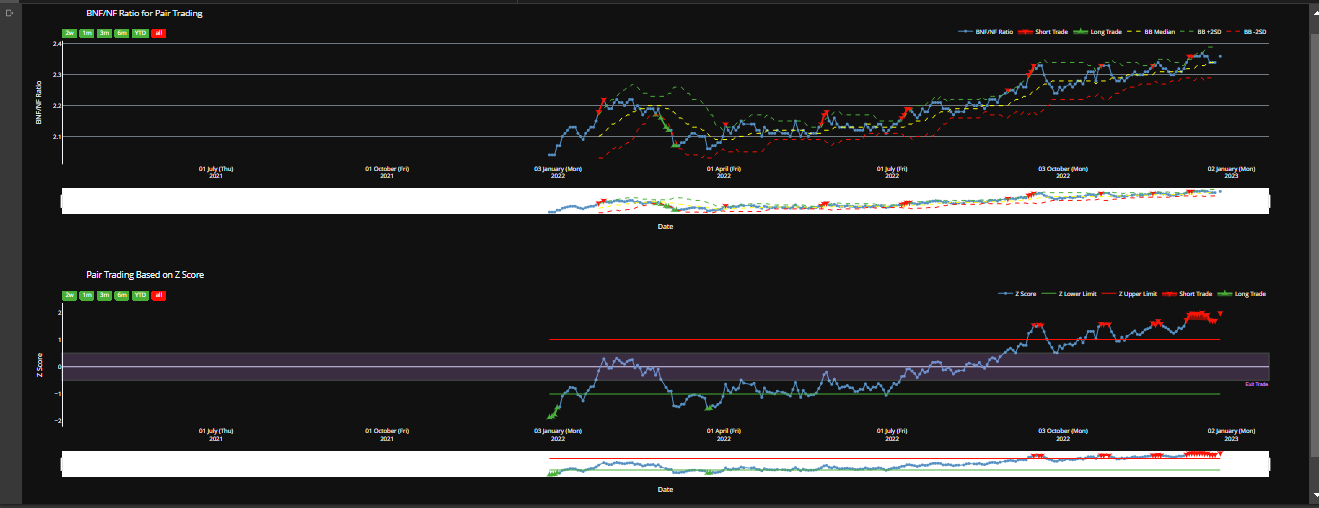

##NOTE: PAIR TRADING Single creation is completed, but implementing it in Derivatives Market (Options/Futures) still in WIP.

Ref link: https://divyankm.github.io/Stock-Exchange-Data-Analysis/frontend_html_files/pair_trading.html